# Homophily

In [62]:
import networkx as nx
import pandas as pd
from collections import Counter
import numpy as np

Let us consider the following (undirected) network.

In [63]:
df = pd.DataFrame({"From": ['A','A','A','A','B','B','C','C','D','D','D', 'E','F','F','G','G','H','H','I'],
                   "To":   ['B','C','D','E','C','D','D','G','E','F', 'G','F','G','I','I','H','I','J','J']})
df

,From,To
0,A,B
1,A,C
2,A,D
3,A,E
4,B,C
5,B,D
6,C,D
7,C,G
8,D,E
9,D,F


In [64]:
G = nx.from_pandas_edgelist(df, source='From', target='To')

Each node of the network has color.

In [65]:
for node in 'ABCDEF':
    G.nodes[node]['color'] = 'lightblue'
for node in 'GHIJ':
    G.nodes[node]['color'] = 'lightgreen'

In [66]:
print(list(G.nodes(data=True)))
colors = [G.nodes[n]['color'] for n in G.nodes()]
colors

[('A', {'color': 'lightblue'}), ('B', {'color': 'lightblue'}), ('C', {'color': 'lightblue'}), ('D', {'color': 'lightblue'}), ('E', {'color': 'lightblue'}), ('G', {'color': 'lightgreen'}), ('F', {'color': 'lightblue'}), ('I', {'color': 'lightgreen'}), ('H', {'color': 'lightgreen'}), ('J', {'color': 'lightgreen'})]


['lightblue',
 'lightblue',
 'lightblue',
 'lightblue',
 'lightblue',
 'lightgreen',
 'lightblue',
 'lightgreen',
 'lightgreen',
 'lightgreen']

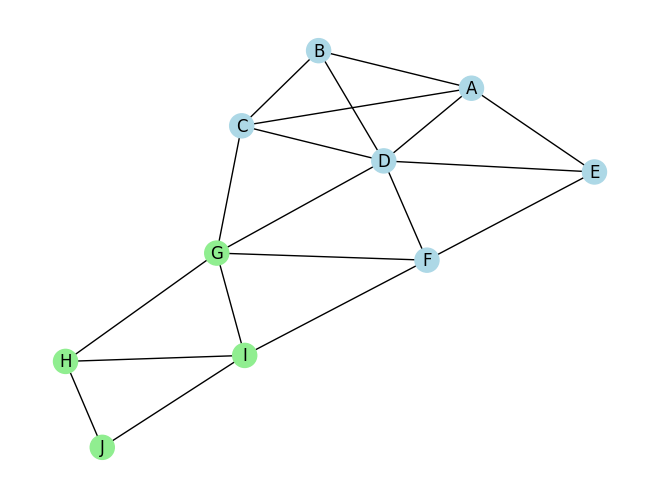

In [67]:
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos=pos, node_color=colors, with_labels=True)

Compute homophily test for the network `G`.

In [68]:
def homophily(G, attr = 'color', threshold = 0.05):
    # compute homophily test for the network G
    # with respect to the attribute attr
    # YOUR CODE HERE
    #compute edge number having the same color at both ends
    edges_same_color = 0
    edges_diff_color = 0
    for edge in G.edges():
        if G.nodes[edge[0]][attr] == G.nodes[edge[1]][attr]:
            edges_same_color += 1
        else:
            edges_diff_color += 1
    #compute color numbers through nodes
    nodes = list(G.nodes())
    colors = {}
    for node in nodes:
        if G.nodes[node][attr] in colors:
            colors[G.nodes[node][attr]] += 1
        else:
            colors[G.nodes[node][attr]] = 1
    #normalize colors
    sum_colors = sum(colors.values())
    for key in colors.keys():
        colors[key] = colors[key]/sum_colors
    #compute homophily
    #compute expected fraction of edges having the same color at both ends
    #get colors keys
    colors_keys = list(colors.keys())
    len_colors = len(colors_keys)
    expected_same = 0
    expected_differents = 0
    for i in range(len_colors):
        expected_same += colors[colors_keys[i]] ** 2
        expected_differents += 2 * colors[colors_keys[i]] * colors[colors_keys[i-1]]

    actual_same = edges_same_color
    actual_differents = edges_diff_color

    print('The actual fraction of edges having the same color at both ends is: ', actual_same/(actual_same+actual_differents), ' but the expected fraction is: ', expected_same/(expected_same+expected_differents))
    print('The actual fraction of edges having different colors at both ends is: ', actual_differents/(actual_same+actual_differents), ' but the expected fraction is: ', expected_differents/(expected_same+expected_differents))
    is_homophily = False
    same_diff = np.abs(actual_same/(actual_same+actual_differents) - expected_same/(expected_same+expected_differents))
    if  same_diff > threshold:
        is_homophily = True
        print('There is homophily in the network observed on the number of same color edges, difference is : ', same_diff)
    diff_diff  = np.abs(actual_differents/(actual_same+actual_differents) - expected_differents/(expected_same+expected_differents))
    if diff_diff > threshold:
        is_homophily = True
        print('There is homophily in the network observed on the number of different color edges, difference is : ', diff_diff)
    return is_homophily


Perform homophily test for the following network.

In [69]:
df = pd.DataFrame({"From" :["A","N","A","D","C","X","S","D","B","R","N"],
                  "To"    :["N","A","D","A","X","C","D","S","A","N","R"],
                  "Colors":[1,0,1,1,1,0,0,1,0,2,2]})

G = nx.from_pandas_edgelist(df, source='From', target='To')
for n in 'ACD':
    G.nodes[n]['color'] = 0
for n in 'BSX':
    G.nodes[n]['color'] = 1
for n in 'RN':
    G.nodes[n]['color'] = 2

print(G.nodes['A']['color'])

0


In [71]:
print(homophily(G, attr='color'))

The actual fraction of edges having the same color at both ends is:  0.3333333333333333  but the expected fraction is:  0.34375
The actual fraction of edges having different colors at both ends is:  0.6666666666666666  but the expected fraction is:  0.65625
False


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a438c523-edf1-4c5b-aec2-0f12c50878d4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>